<a href="https://colab.research.google.com/github/jgamidi/DataScienceCapstoneProjects/blob/master/52Startups_Profit_Prediction_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('50_Startups.csv')

# New Section

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        48 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  49 non-null     float64
 3   State            49 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,NaN,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,NaN,149759.96


In [5]:
data.dropna(axis=0,inplace=True)

In [6]:
data[data['R&D Spend']==0].index

Int64Index([47, 49], dtype='int64')

In [7]:
data.drop(labels=data[data['R&D Spend']==0].index,inplace=True)

In [8]:
data[data['Marketing Spend']==0].index

Int64Index([19, 48], dtype='int64')

In [9]:
data.drop(labels=data[data['Marketing Spend']==0].index,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 46
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        43 non-null     float64
 1   Administration   43 non-null     float64
 2   Marketing Spend  43 non-null     float64
 3   State            43 non-null     object 
 4   Profit           43 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [11]:
data.State.value_counts()

New York      15
Florida       15
California    13
Name: State, dtype: int64

In [12]:
state_dummies=pd.get_dummies(data.State)

In [13]:
features=data.iloc[:,:-1]
label=data.Profit

In [14]:
features=features.join(state_dummies)
features.drop(columns=['State'],inplace=True)

In [15]:
print(features.shape)
print(label.shape)

(43, 6)
(43,)


In [16]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 46
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        43 non-null     float64
 1   Administration   43 non-null     float64
 2   Marketing Spend  43 non-null     float64
 3   California       43 non-null     uint8  
 4   Florida          43 non-null     uint8  
 5   New York         43 non-null     uint8  
dtypes: float64(3), uint8(3)
memory usage: 2.7 KB


In [17]:
#Feature Standization
from sklearn.preprocessing import StandardScaler

In [18]:
stdScaler=StandardScaler()

In [19]:
features=pd.DataFrame(stdScaler.fit_transform(features))

In [20]:
features.head()

,0,1,2,3,4,5
0,2.079578,0.542260,2.208975,-0.658281,-0.731925,1.366260
1,2.015921,1.084163,1.960483,1.519109,-0.731925,-0.731925
2,1.804092,-0.795760,1.640003,-0.658281,1.366260,-0.731925
3,1.594277,-0.139842,1.419586,-0.658281,-0.731925,1.366260
4,1.541875,-1.160793,1.267819,-0.658281,1.366260,-0.731925


In [21]:
#Label Normalization
from sklearn.preprocessing import MinMaxScaler
minMaxLabel = MinMaxScaler()
label = minMaxLabel.fit_transform([label])

In [22]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(features,label.reshape(-1,1),test_size=0.3,random_state=1)

In [60]:
import tensorflow as tf
model=tf.keras.models.Sequential()

In [67]:
model.add(tf.keras.layers.Dense(units=12,activation='relu',input_shape=(6,)))
model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=12,activation='relu'))
model.add(tf.keras.layers.Dense(units=12,activation='relu'))
# model.add(tf.keras.layers.Dense(units=90,activation='relu'))
# model.add(tf.keras.layers.Dense(units=80,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='linear')) # Output Layer

In [68]:
# Custom Metric Function ---> r2_keras_custom

def r2_keras_custom(y_true, y_pred):
    SS_res = tf.keras.backend.sum(tf.keras.backend.square(y_true - y_pred))
    SS_total = tf.keras.backend.sum(tf.keras.backend.square(y_true - tf.keras.backend.mean(y_true)))
    
    return (1 - SS_res / (SS_total + tf.keras.backend.epsilon()))

In [69]:
class MyThresholdCallBack(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyThresholdCallBack, self).__init__()
        self.cl = cl
    def on_epoch_end(self,epoch, logs):
        train_score = logs["r2_keras_custom"]
        test_score = logs["val_r2_keras_custom"]
        
        if tf.keras.backend.abs(test_score - train_score) < 5 and test_score > self.cl:
            self.model.stop_training = True

In [70]:
model.compile(optimizer='sgd',loss='mean_squared_error',metrics=[r2_keras_custom])

In [71]:
myThresholdCallBack = MyThresholdCallBack(0.93)
history=model.fit(x=x_train,y=y_train,epochs=1000,validation_data=(x_test,y_test), callbacks=myThresholdCallBack)

Epoch 1/1000
1/1 [==============================] - 1s 819ms/step - loss: 7.7424e-09 - r2_keras_custom: -1.3227 - val_loss: 1.4091e-08 - val_r2_keras_custom: -0.8319
Epoch 2/1000
1/1 [==============================] - 0s 32ms/step - loss: 7.5082e-09 - r2_keras_custom: -1.2525 - val_loss: 1.3744e-08 - val_r2_keras_custom: -0.7867
Epoch 3/1000
1/1 [==============================] - 0s 31ms/step - loss: 7.2964e-09 - r2_keras_custom: -1.1889 - val_loss: 1.3422e-08 - val_r2_keras_custom: -0.7449
Epoch 4/1000
1/1 [==============================] - 0s 34ms/step - loss: 7.1041e-09 - r2_keras_custom: -1.1312 - val_loss: 1.3123e-08 - val_r2_keras_custom: -0.7060
Epoch 5/1000
1/1 [==============================] - 0s 29ms/step - loss: 6.9279e-09 - r2_keras_custom: -1.0784 - val_loss: 1.2844e-08 - val_r2_keras_custom: -0.6697
Epoch 6/1000
1/1 [==============================] - 0s 28ms/step - loss: 6.7661e-09 - r2_keras_custom: -1.0298 - val_loss: 1.2582e-08 - val_r2_keras_custom: -0.6357
Epoch 7/1

In [72]:
import matplotlib.pyplot as plt

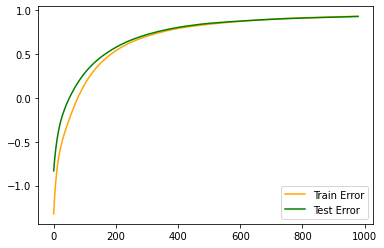

In [73]:
plt.plot(history.history['r2_keras_custom'],color='orange')
plt.plot(history.history['val_r2_keras_custom'], color ='green')
plt.legend(['Train Error','Test Error'])